# Clustering - Electricity Demand in Portgual During 2013-2014
Analysis by Jordan Lue

## Learning Outcomes

* Explore a dataset and carry out clustering using k-means algorithm

* Identify the optimum number of clusters for a given dataset

## Contents

 1. Problem Description  
 2. Data Preparation  
 2.1. Load the data  
 2.2. Data Overview  
 2.3. Prepare Data for Analysis  
 3. Clustering  
 3.1. Clustering All Customers Hourly, Normalized Profiles  
 3.1.1. Assess the 2 Cluster Result  
 3.1.2. Assess the 5 Cluster Result  
 3.1.3. Justification of Choices  
 3.2. Clustering for Customer MT_022 for All Days Between 2013-2014  
 3.2.1. Choosing Number of Clusters  
 3.2.2. Assess the 2 Cluster Result  
 3.2.3. Assess the 5 Cluster Result  
 4. Appendix  
 4.1. References  
 4.2. Useful Notes  

## 1. Problem Description

In this assignment, you will study the electricity demand from clients in Portugal, during 2013 and 2014. You have been provided with the data file, which you should download when you download this assignment file.

The data$^1$ available contains 370 time series, corresponding to the electric demand$^2$ for 370 clients, between 2011 and 2014. 

In this guided exercise, you will use clustering techniques to understand the typical usage behaviour during 2013-2014.

Both these datasets are publicly available, and can be used to carry out experiments. Their source is below:

 1. Data:
https://archive.ics.uci.edu/ml/datasets/ElectricityLoadDiagrams20112014#

 2. Electric Demand:
http://www.think-energy.net/KWvsKWH.htm

We will start by exploring the data set and continue on to the assignment.  Consider this as a working notebook, you will add your work to the same notebook.

In this assignment we will use the sklearn package for k-means.  Please refer here for the documentation https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

The sklearn package for k-means is one of the many clustering algorithms found in the module "sklearn.cluster".  These come with a variety of functions that you can call by importing the package.

For example 
    
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.cluster import KMeans

## 2. Data Preparation
### 2.1. Load the data

Start by downloading the data to a local directory and modify the "pathToFile" and "fileName" variables, if needed. The data file has been provided with this assignment. It is also available at the links provided above.

In [657]:
pathToFile = ""
fileName = 'LD2011_2014.txt'

In [658]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
random.seed(42)

In [659]:
# Replace "," by ".", otherwise the numbers will be in the form 2,3445 instead of 2.3445
import fileinput

with fileinput.FileInput(pathToFile+fileName, inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace(",", "."), end='')

In [660]:
# Create dataframe
import pandas as pd
data = pd.read_csv(pathToFile+fileName, sep=";", index_col=0)

### 2.2. Data Overview

In [661]:
data.head(2)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [662]:
data.tail(2)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.17524,225.589226,64.685315,72.043011,...,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541
2015-01-01 00:00:00,2.538071,19.914651,1.737619,178.861789,84.146341,279.761905,10.17524,249.158249,62.937063,69.892473,...,188.436831,27800.0,1409.282700,954.545455,27.379400,4.095963,628.621598,131.886477,673.020528,7135.135135


In [663]:
data.shape

(140256, 370)

#### As it can be seen, the dataframe contains a row for each interval of 15 minutes between Jan 1, 2011 to Dec 31 2014. There are 370 columns corresponding 370 clients. The dataframe is indexed by the timestamp.

Since the frequency is 15 minutes, each day provides $24\times 4 = 96$ datapoints, which multiplied by 365 days and 4 years (plus 1 day in Feb 29, 2012) gives: $96 \times 365 \times 4 + 96 = 140256$, as observed in data.shape

In [664]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0+ MB


In [665]:
data.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309,141.227385,4.521338,191.401476,39.975354,42.205152,...,218.213701,37607.987537,1887.427366,2940.031734,65.413150,9.269709,424.262904,94.704717,625.251734,8722.355145
std,5.983965,13.272415,11.014456,58.248392,26.461327,98.439984,6.485684,121.981187,29.814595,33.401251,...,204.833532,38691.954832,1801.486488,2732.251967,65.007818,10.016782,274.337122,80.297301,380.656042,9195.155777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659,71.428571,0.565291,111.111111,13.986014,9.677419,...,5.710207,0.000000,0.000000,0.000000,13.037810,0.000000,0.000000,30.050083,83.944282,0.000000
50%,1.269036,24.893314,1.737619,87.398374,39.024390,157.738095,2.826456,222.222222,40.209790,40.860215,...,131.334761,24100.000000,1050.632911,2136.363636,31.290743,7.021650,525.899912,76.794658,758.064516,0.000000
75%,2.538071,29.871977,1.737619,115.853659,54.878049,205.357143,4.522329,279.461279,57.692308,61.290323,...,403.283369,54800.000000,3312.236287,5363.636364,108.213820,11.702750,627.743635,151.919866,875.366569,17783.783784
max,48.223350,115.220484,151.172893,321.138211,150.000000,535.714286,44.657999,552.188552,157.342657,198.924731,...,852.962170,192800.000000,7751.054852,12386.363636,335.071708,60.269163,1138.718174,362.270451,1549.120235,30918.918919


### Plot the first 2 days of 2012 for the first 2 clients

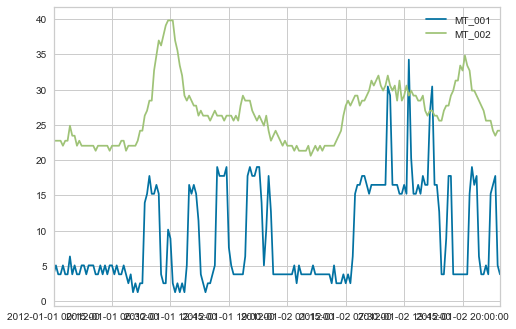

In [666]:
data_example = data.loc['2012-01-01 00:15:00':'2012-01-03 00:00:00'][['MT_001','MT_002']]
data_example.plot()
plt.show()

#### We  note that the main difference between the curves is the level (also seen on the means in df.describe()).  We know we will have to somehow normalize the curves, in order for the clustering technique to capture the behaviour of the consumption throughout the day.

### 2.3. Prepare Data for Analysis

We focus on 2013 and 2014 because these are the years with low number of clients having zero demand

In [667]:
data2011 = data.loc['2011-01-01 00:15:00':'2012-01-01 00:00:00']
data2012 = data.loc['2012-01-01 00:15:00':'2013-01-01 00:00:00']
data2013 = data.loc['2013-01-01 00:15:00':'2014-01-01 00:00:00']
data2014 = data.loc['2014-01-01 00:15:00':'2015-01-01 00:00:00']

In [668]:
# Check number of days
print(data2011.shape[0]/96)
print(data2012.shape[0]/96)
print(data2013.shape[0]/96)
print(data2014.shape[0]/96)

365.0
366.0
365.0
365.0


In [669]:
# See number of clients with 0 demand per year
print(sum(data2011.mean()==0))
print(sum(data2012.mean()==0))
print(sum(data2013.mean()==0))
print(sum(data2014.mean()==0))

210
37
21
1


In [670]:
clients = data2011.columns
clients_no_demand = clients[data2013.mean()==0] # clients with 0 demand
data_13_14 = data2013.append(data2014) # appending 2013 and 2014
data_13_14 = data_13_14.drop(clients_no_demand, axis=1) # drop clients with 0 demand
print(data_13_14.shape)
print(sum(data_13_14.mean()==0)) # check that there are no clients with 0 demand

(70080, 349)
0


#### Getting average curves per client

In [671]:
data = data_13_14.copy() # weekdays weekends, data2011, data2012, data2013, data2014

In [672]:
data['hour'] = data.index.map(lambda x: x[11:]) #Get just the hour portion of the string

In [673]:
data.head(3)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370,hour
2013-01-01 00:15:00,2.538071,22.759602,2.606429,138.211382,63.414634,255.952381,4.522329,239.057239,57.692308,78.494624,...,22300.0,886.075949,1000.000000,16.949153,6.436513,616.330114,76.794658,731.671554,8086.486486,00:15:00
2013-01-01 00:30:00,1.269036,22.759602,2.606429,138.211382,63.414634,264.880952,5.652911,228.956229,57.692308,76.344086,...,21000.0,864.978903,909.090909,18.252934,3.510825,564.530290,76.794658,727.272727,8086.486486,00:30:00
2013-01-01 00:45:00,2.538071,22.759602,2.606429,134.146341,60.975610,250.000000,5.652911,239.057239,54.195804,76.344086,...,18200.0,860.759494,840.909091,16.949153,5.851375,590.869183,68.447412,730.205279,7848.648649,00:45:00


#### Average Customer Demand Per Hour

In [674]:
datagrouped = data.groupby("hour")
average_curves = datagrouped.agg("mean")
average_curves.shape 

(96, 349)

* The dataframe average_curves contains the 349 typical weekday electric demands
* We now divide each curve by its mean, so that all curves have mean 1

In [675]:
average_curves_norm = average_curves/(average_curves.mean())

#### Plot the first 2 and last 2 clients

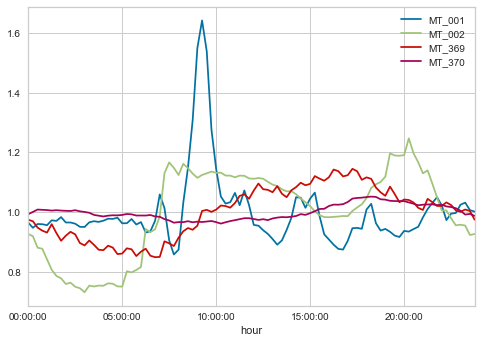

In [676]:
average_curves_norm[['MT_001','MT_002','MT_369','MT_370']].plot()
plt.show()

#### Preparing the X array of features

In [677]:
average_curves_norm.shape

(96, 349)

In [678]:
X = average_curves_norm.copy()
X = np.array(X.T) # put it on the right format

In [679]:
X.shape

(349, 96)

In [680]:
average_curves_norm.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
hour,,,,,,,,,,,,,,,,,,,,,
00:00:00,0.964792,0.926674,0.991800,1.140106,1.186498,1.008914,1.170686,0.946572,0.983915,0.948867,...,0.414676,0.748555,0.561491,0.430085,0.471574,1.358632,1.215272,1.170441,0.974307,0.992967
00:15:00,0.947378,0.919117,0.977796,1.099159,1.131703,0.946419,1.118666,0.909376,0.953996,0.924425,...,0.414381,0.662602,0.412336,0.375704,0.423108,1.365299,1.184899,1.223818,0.969266,1.000548
00:30:00,0.960104,0.880744,0.976579,1.061641,1.090238,0.905552,1.081459,0.881217,0.931614,0.908674,...,0.386706,0.561815,0.395294,0.344682,0.386975,1.312627,1.177781,1.211343,0.947969,1.008515
00:45:00,0.959434,0.877243,0.971708,1.030153,1.053960,0.868064,1.056382,0.855331,0.907404,0.885073,...,0.337499,0.499651,0.352628,0.295219,0.377024,1.245171,1.156699,1.189829,0.937889,1.007613
01:00:00,0.956085,0.841989,0.953443,0.975761,1.024347,0.822656,1.030838,0.830275,0.888265,0.869041,...,0.318475,0.422753,0.342066,0.288892,0.369187,1.292298,1.149629,1.167326,0.931284,1.006770


In [681]:
# There are 349 customers and 96 different chunks of 15 minutes 

## 3. Clustering
### 3.1. Clustering All Customers Hourly, Normalized Profiles

**Q1: (7 marks)**

a. Determine what a convenient number of clusters. Justify your choice.  Make use of the sklearn's package for k-means for this. 

b. Make a plot for each cluster, that includes:
    - The number of clients in the cluster (you can put this in the title of the plot)
    - All the curves in the cluster
    - The curve corresponding to the center of the cluster (make this curve thicker to distinguish it from the individual curves).  The center is also sometimes referred to as "centroid".
    
You have 2 separate plots for each cluster if you prefer (one for the individual curves, one for the centroid)

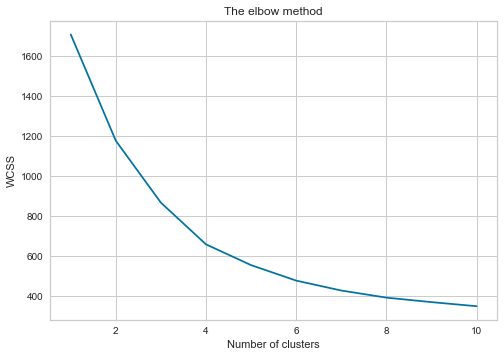

In [682]:
# Reference: https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.37191838565388763
For n_clusters = 3 The average silhouette_score is : 0.42244692513476645
For n_clusters = 4 The average silhouette_score is : 0.4296355372224771
For n_clusters = 5 The average silhouette_score is : 0.43445138922045784
For n_clusters = 6 The average silhouette_score is : 0.42897266370039355
For n_clusters = 7 The average silhouette_score is : 0.26704249410848374
For n_clusters = 8 The average silhouette_score is : 0.2704969848626904
For n_clusters = 9 The average silhouette_score is : 0.2422047742773313
For n_clusters = 10 The average silhouette_score is : 0.21856080297614097


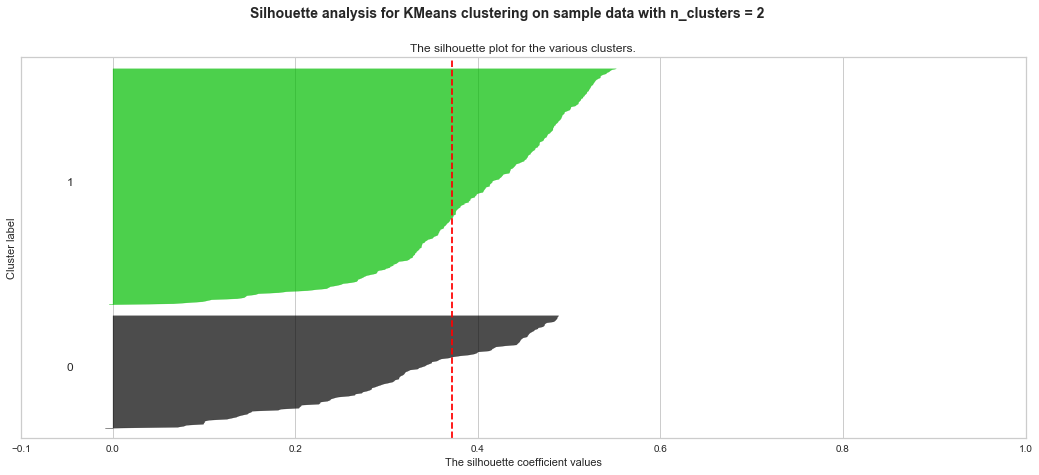

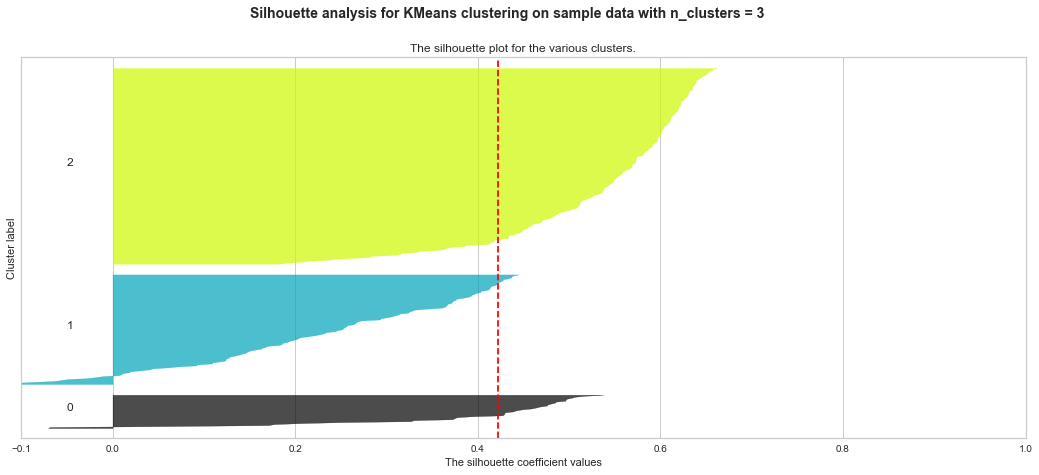

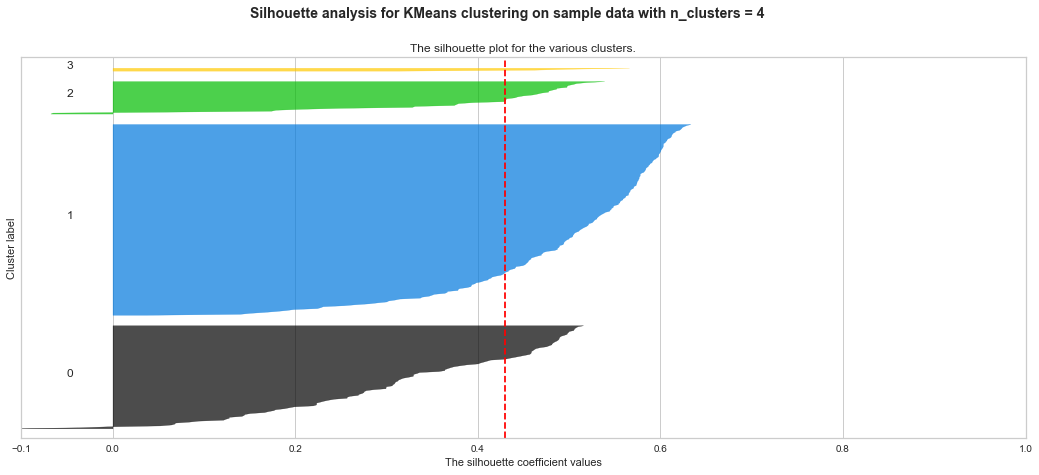

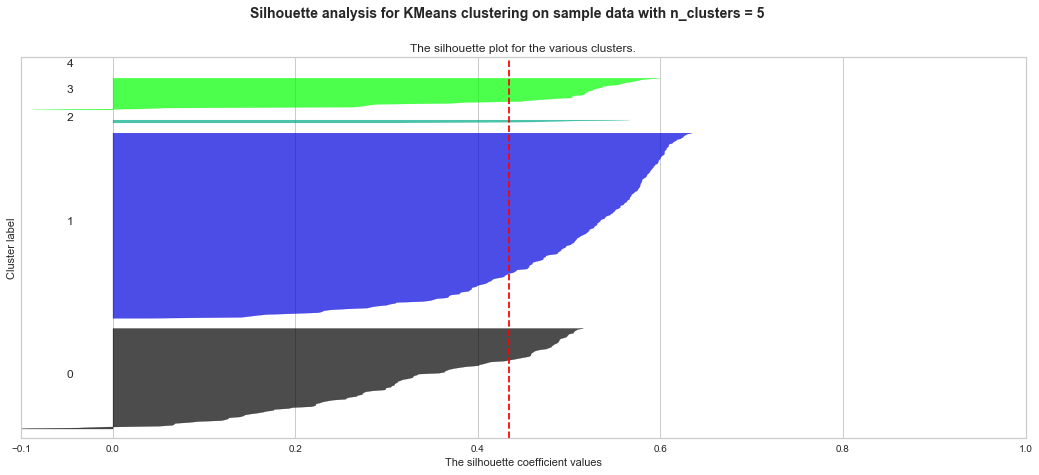

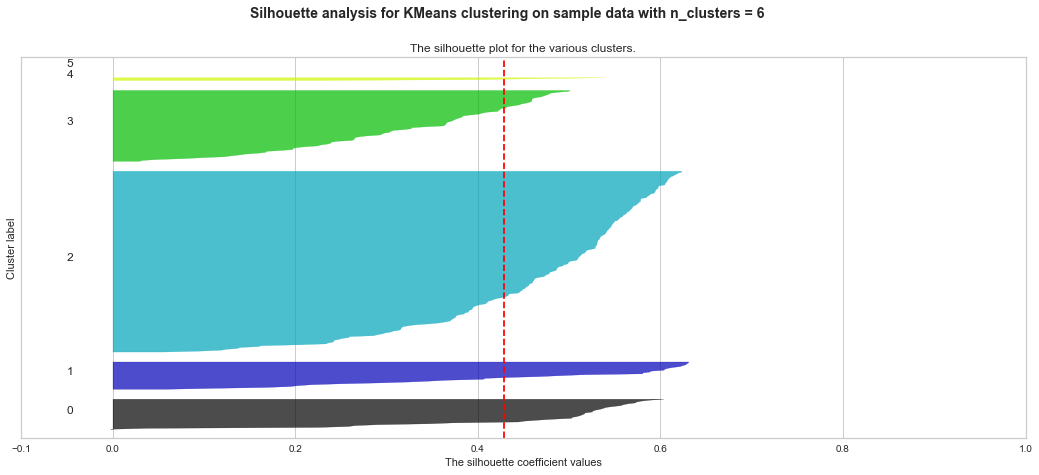

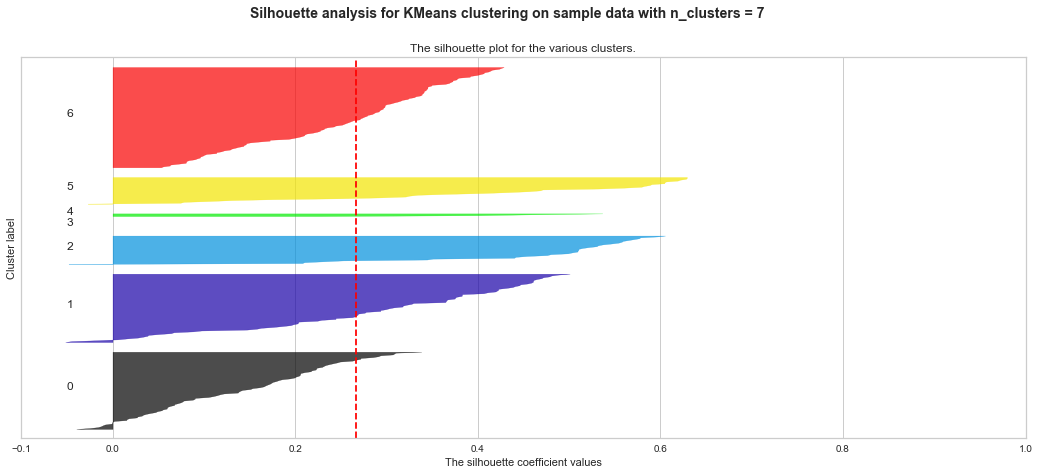

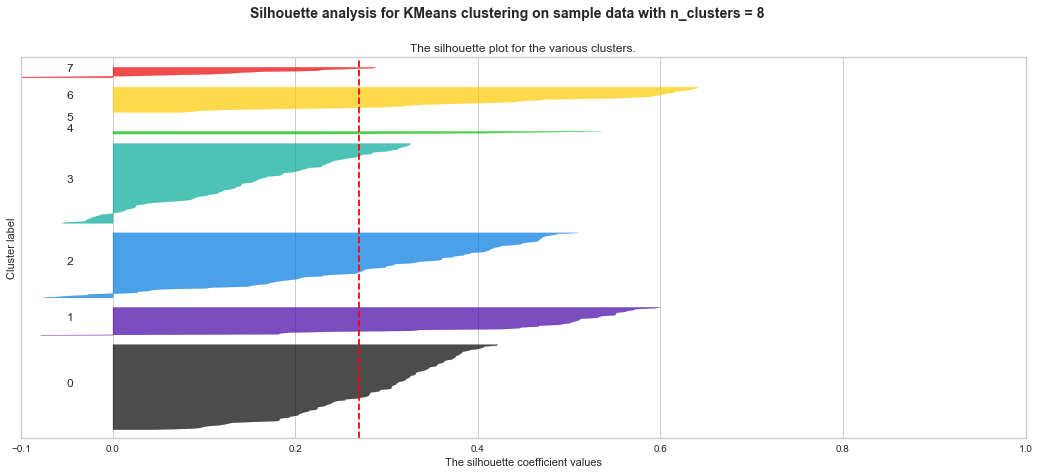

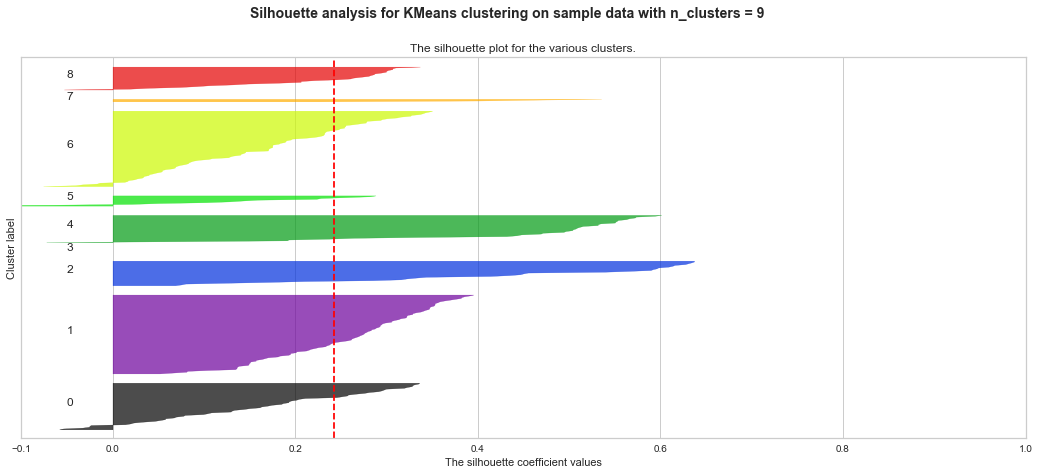

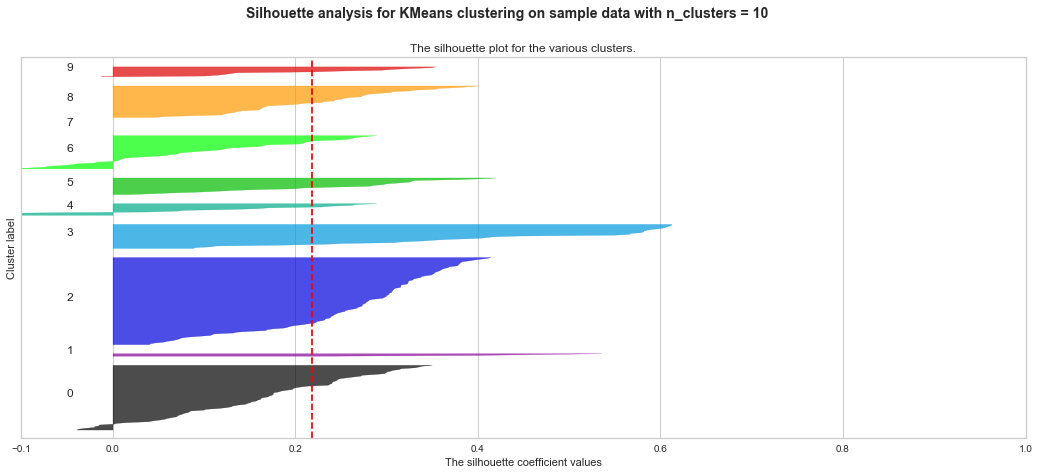

In [683]:
# Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range(2, 11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [684]:
clusterer = KMeans(n_clusters=2)
cluster_labels = clusterer.fit_predict(X)

In [685]:
centers = clusterer.cluster_centers_

Centers shows the location of the center of the cluster. We have an array for each center, with the location across the 96 time blocks.

Next, I want to find out the label for each of the data points and which cluster it belongs go

#### 3.1.1. Assess the 2 Cluster Result

In [686]:
# Crete a dataframe for the outcomes and store the cluster labels in it
# Reference Centroid Labels to Dataframe: https://stackoverflow.com/questions/27504870/sklearn-kmeans-get-class-centroid-labels-and-reference-to-a-dataset
outcomes_df = pd.DataFrame(index=average_curves_norm.T.index).reset_index()
outcomes_df['Outcome']=pd.DataFrame(pd.Series(cluster_labels))
outcomes_df.set_index('index', inplace=True);

In [687]:
# Join the outcomes back to the original data so we can graph it
avg_df = average_curves_norm.T
avg_df = avg_df.join(outcomes_df, how='left')
avg_df.head()

,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00,Outcome
MT_001,0.964792,0.947378,0.960104,0.959434,0.956085,0.972494,0.970485,0.983211,0.965127,0.965127,...,1.049852,1.022727,0.973164,0.994931,0.996941,1.024736,1.031768,1.006652,1.001629,1
MT_002,0.926674,0.919117,0.880744,0.877243,0.841989,0.806701,0.786076,0.778034,0.759108,0.763579,...,1.049731,1.005708,1.005500,0.979363,0.955618,0.957767,0.954925,0.923346,0.926570,1
MT_003,0.991800,0.977796,0.976579,0.971708,0.953443,0.949181,0.954660,0.947354,0.918739,0.925436,...,1.101391,1.092867,1.081908,1.069122,1.038072,1.009456,1.003976,0.998497,0.993017,1
MT_004,1.140106,1.099159,1.061641,1.030153,0.975761,0.920906,0.897345,0.875850,0.855450,0.836217,...,1.495640,1.462960,1.422622,1.389845,1.347294,1.293558,1.238946,1.209744,1.175290,1
MT_005,1.186498,1.131703,1.090238,1.053960,1.024347,0.992994,0.962757,0.934785,0.918994,0.903958,...,1.376127,1.382463,1.388340,1.385878,1.369364,1.352292,1.324550,1.272842,1.231541,1


In [688]:
# Create a dataframe for the centers by hour
center_df = pd.DataFrame(centers).T
center_df.set_index(average_curves_norm.index, inplace=True)

Text(0.5, 0.98, '2 Clusters')

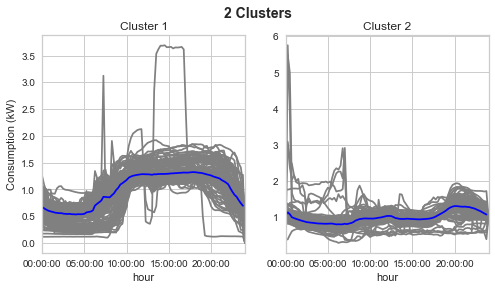

In [689]:
fig=plt.figure(figsize=(8,4))
ax=fig.add_subplot(1,2,1)
avg_df[avg_df['Outcome']==0].T.plot.line(color='grey', legend=False, ax=ax)
center_df[[0]].plot.line(color='blue', ax=ax, legend=False)
ax2=fig.add_subplot(1,2,2)
avg_df[avg_df['Outcome']==1].T.plot.line(color='grey', legend=False, ax=ax2)
center_df[[1]].plot.line(color='blue', ax=ax2, legend=False)
ax.set_title("Cluster 1")
ax.set_ylabel("Consumption (kW)")
ax2.set_title("Cluster 2")
plt.suptitle(("2 Clusters"),
                 fontsize=14, fontweight='bold')

#### 3.1.2. Assess the 5 Cluster Result

In [690]:
clusterer = KMeans(n_clusters=5)
cluster_labels = clusterer.fit_predict(X)
centers = clusterer.cluster_centers_
outcomes_df = pd.DataFrame(index=average_curves_norm.T.index).reset_index()
outcomes_df['Outcome']=pd.DataFrame(pd.Series(cluster_labels))
outcomes_df.set_index('index', inplace=True);
avg_df = average_curves_norm.T
avg_df = avg_df.join(outcomes_df, how='left')

##Create a dataframe for the centers by hour
center_df = pd.DataFrame(centers).T
center_df.set_index(average_curves_norm.index, inplace=True)

Text(0.5, 0.98, '5 Clusters')

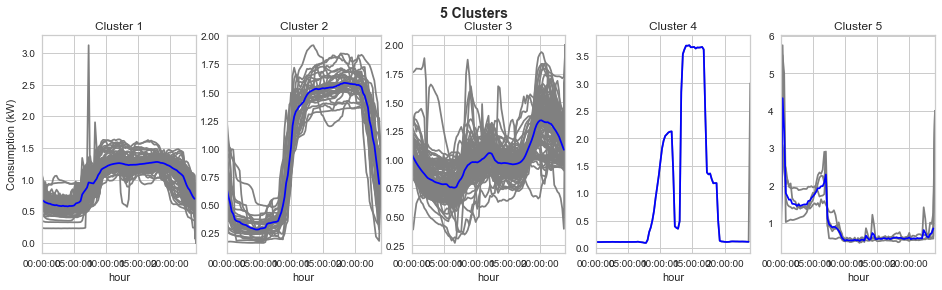

In [691]:
fig=plt.figure(figsize=(16,4))
ax=fig.add_subplot(1,5,1)
avg_df[avg_df['Outcome']==0].T.plot.line(color='grey', legend=False, ax=ax)
center_df[[0]].plot.line(color='blue', ax=ax, legend=False)
ax2=fig.add_subplot(1,5,2)
avg_df[avg_df['Outcome']==1].T.plot.line(color='grey', legend=False, ax=ax2)
center_df[[1]].plot.line(color='blue', ax=ax2, legend=False)
ax3=fig.add_subplot(1,5,3)
avg_df[avg_df['Outcome']==2].T.plot.line(color='grey', legend=False, ax=ax3)
center_df[[2]].plot.line(color='blue', ax=ax3, legend=False)
ax4=fig.add_subplot(1,5,4)
avg_df[avg_df['Outcome']==3].T.plot.line(color='grey', legend=False, ax=ax4)
center_df[[3]].plot.line(color='blue', ax=ax4, legend=False)
ax5=fig.add_subplot(1,5,5)
avg_df[avg_df['Outcome']==4].T.plot.line(color='grey', legend=False, ax=ax5)
center_df[[4]].plot.line(color='blue', ax=ax5, legend=False)


ax.set_title("Cluster 1")
ax.set_ylabel("Consumption (kW)")
ax2.set_title("Cluster 2")
ax3.set_title("Cluster 3")
ax4.set_title("Cluster 4")
ax5.set_title("Cluster 5")
plt.suptitle(("5 Clusters"),
                 fontsize=14, fontweight='bold')

#### 3.1.3. Justification of Choices

From the elbow chart, an obvious elbow is not apparent. It looks like 2 or 4 clusters represent the elbow inflections. 

From the sillhouette score, 5 clusters had the highest score at 5: 0.4344. Looking at the analysis shows some clusters that are very small, and we see this again when plotting the clusters versus their centers. 

Although 2 clusters had a sillouette score of 0.3719, we see 2 clusters that are closer in thickness than the alternatives. The other clustering alternatives seem to always have a very small cluster. When plotting the clusters versus their centers, it produces 2 distinct clusters and so I will choose to model the scenario with 2 clusters.

### 3.2. Clustering for Customer MT_022 for All Days Between 2013-2014
**Q2: (8 marks)**

In this exercise you work with the daily curves of 1 single client.
First, create a list of arrays, each array containing a normalized curve for a day. The list contains 730 arrays, one for each of the days of 2013 and 2014.

a. Determine the optimal value of k ( number of clusters). You may refer to the module to figure out how to come up with the optimal number of clusters.

b. Based on your result from the Q2 (a), what do understand?  Interpret it perhaps with different perspectives of timelines like weeks or months.

#### The following cell generates a list of all the days in the two years 2013-2014, which is helpful to answer part (b)

In [692]:
client = 'MT_022'
oneClient = data_13_14[client]
X = [] # a list of arrays, each array being a normalized curve for a day
for J in range(2*365):
    X.extend([np.array(oneClient[J*96:(J+1)*96])/np.mean(oneClient[J*96:(J+1)*96])])

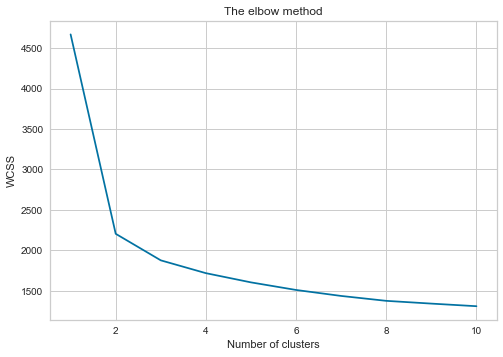

In [693]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.47363399587647004
For n_clusters = 3 The average silhouette_score is : 0.26841853255105896
For n_clusters = 4 The average silhouette_score is : 0.22493388442082385
For n_clusters = 5 The average silhouette_score is : 0.17051229182001848
For n_clusters = 6 The average silhouette_score is : 0.14873226270763895
For n_clusters = 7 The average silhouette_score is : 0.15138413413181412
For n_clusters = 8 The average silhouette_score is : 0.15834752485824724
For n_clusters = 9 The average silhouette_score is : 0.13704899600522527
For n_clusters = 10 The average silhouette_score is : 0.12477412039402451


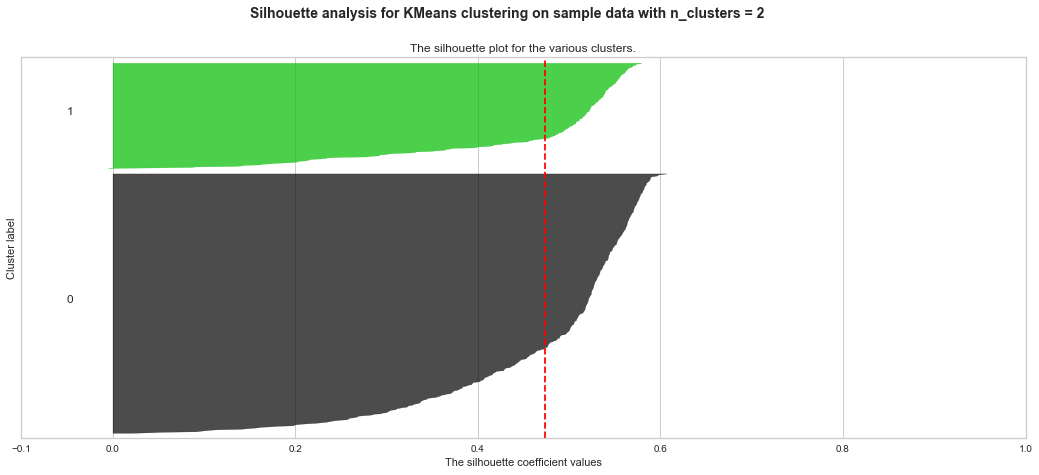

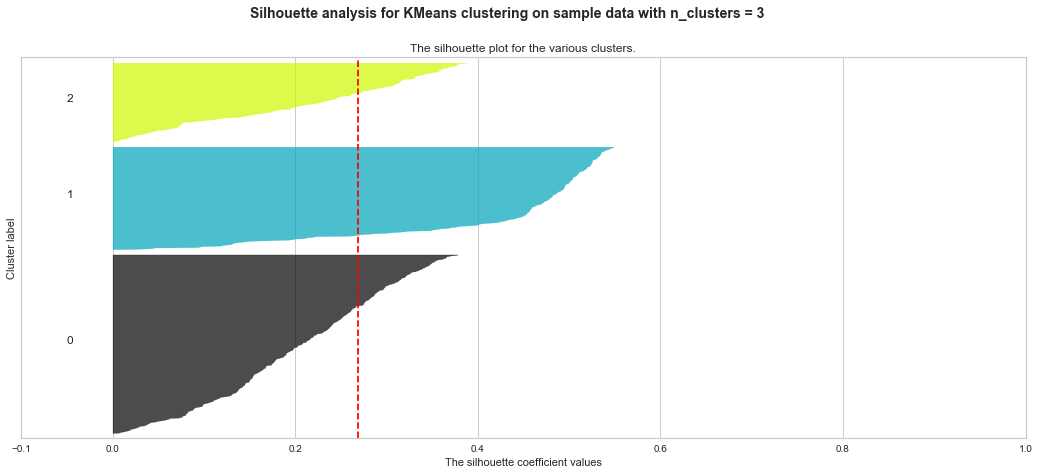

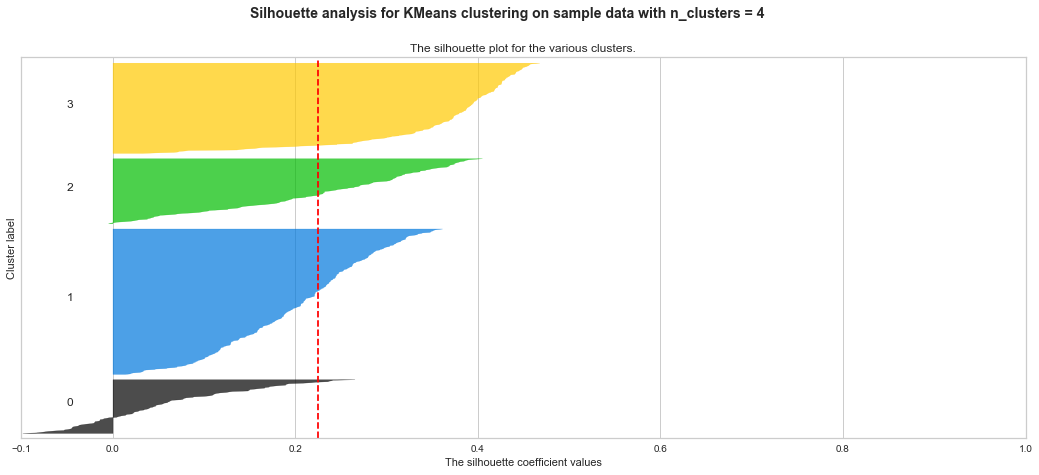

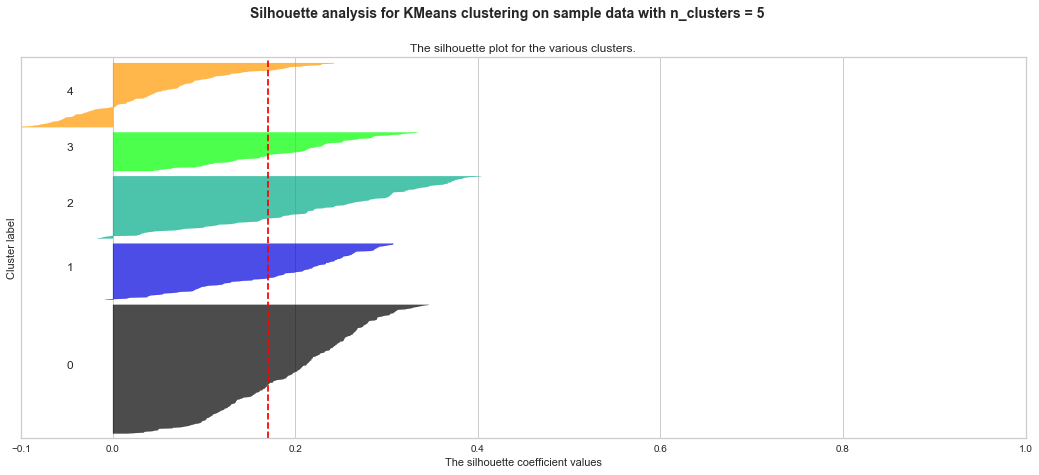

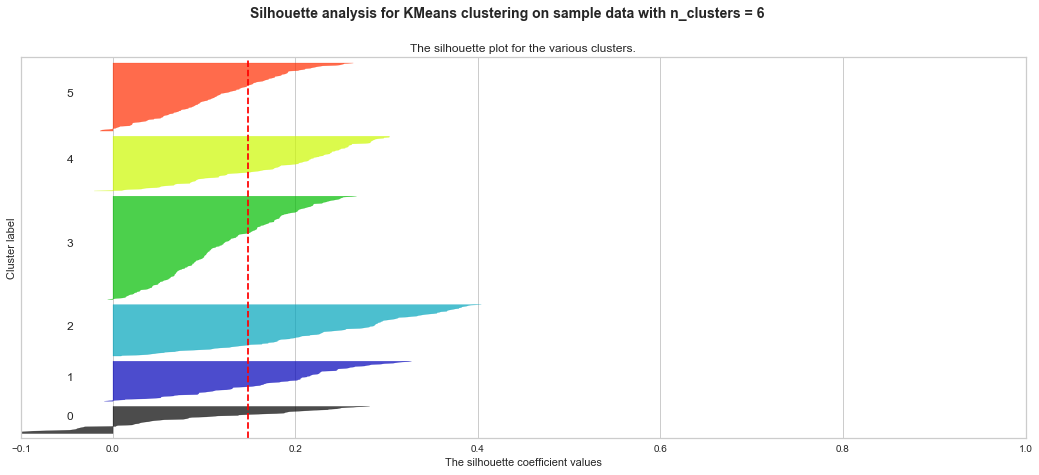

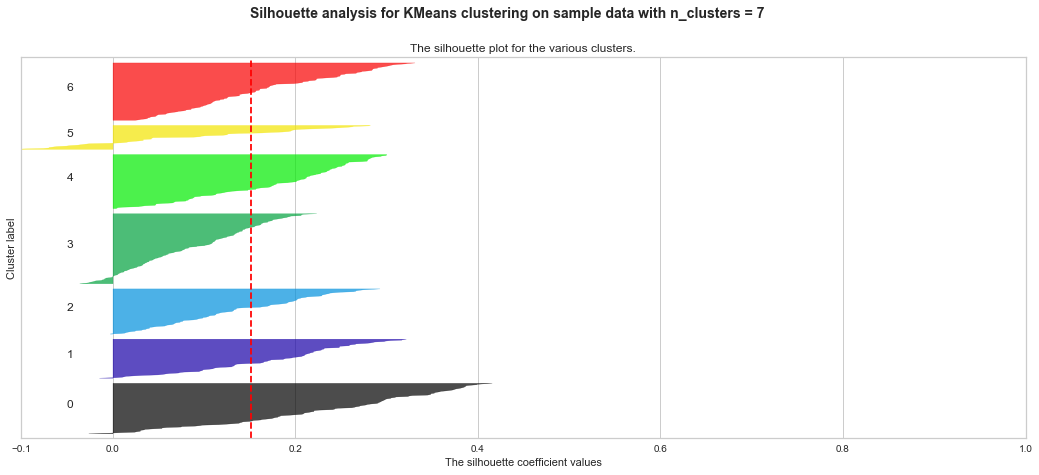

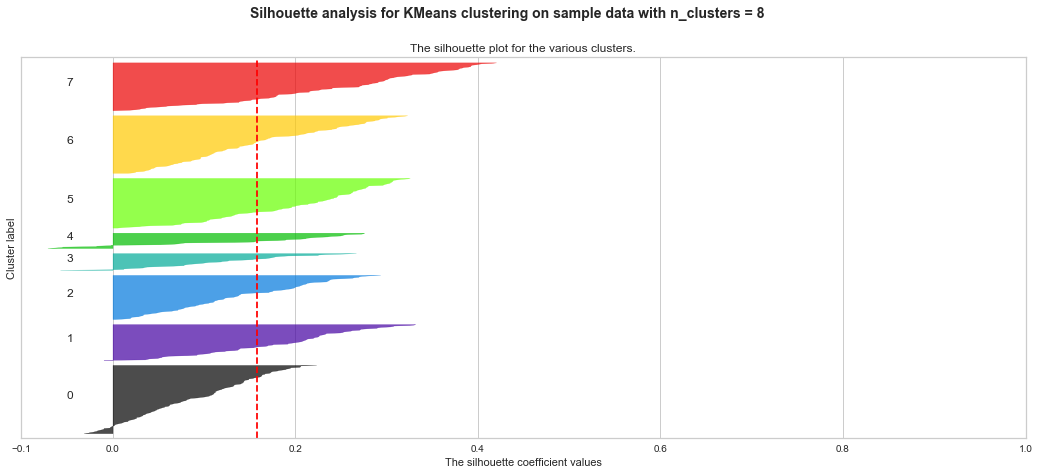

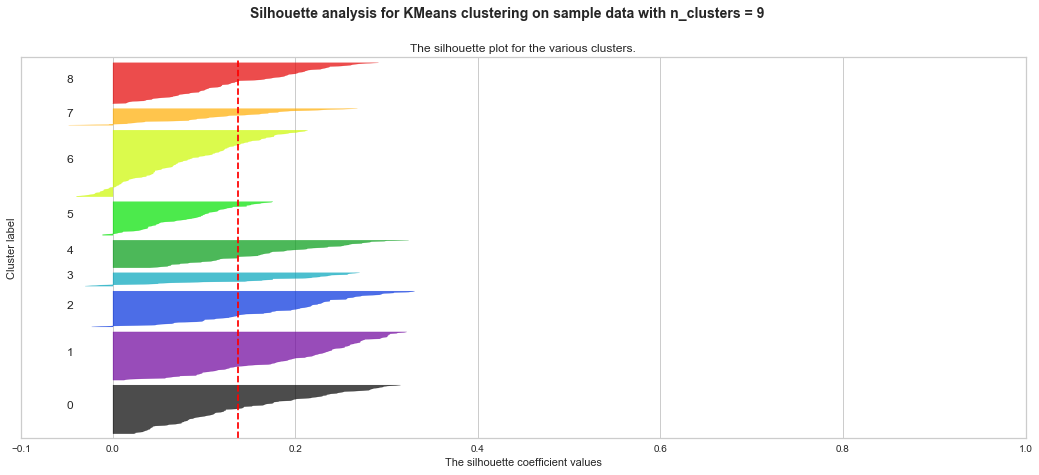

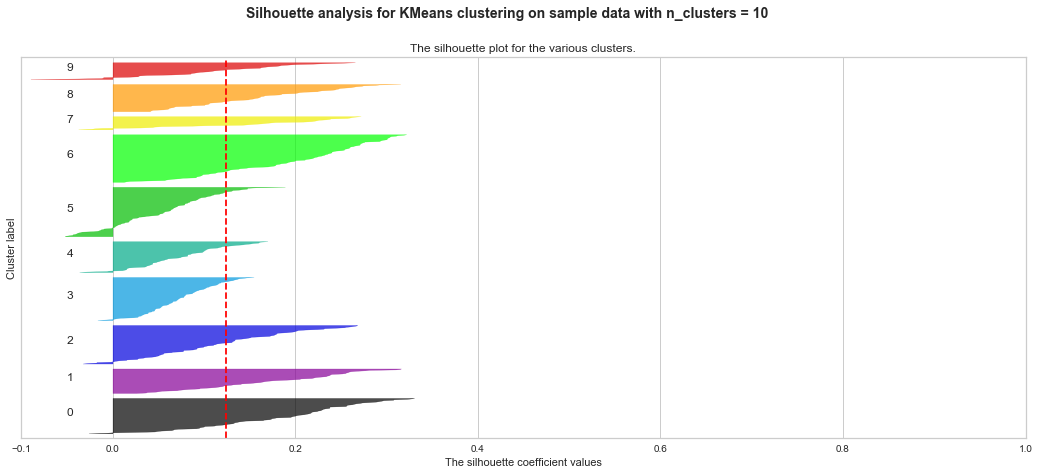

In [694]:
for n_clusters in range(2, 11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### 3.2.1. Choosing Number of Clusters

There is a clear break on the elbow chart at 2 clusters, and the sillhouette score is highest for 2 clusters. Because of these 2 factors, I will choose to proceed with 2 clusters.

However, out of curiosity, I also repeated the exercise for 3 clusters.

#### 3.2.2. Assess the 2 Cluster Result

In [695]:
clusterer = KMeans(n_clusters=2)
cluster_labels = clusterer.fit_predict(X)
centers = clusterer.cluster_centers_

In [696]:
X_df = pd.DataFrame.from_records(X)

In [697]:
clusterlabel_df = (pd.DataFrame(cluster_labels))

In [698]:
X_df['Outcome'] = clusterlabel_df

In [699]:
X_df.columns = avg_df.columns

In [700]:
# Change index to dates
X_df.index = pd.to_datetime(X_df.index, origin=pd.Timestamp('2013-01-01'), unit='d')  

In [701]:
X_df.head()

,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00,Outcome
2013-01-01,1.372998,1.263158,1.208238,1.098398,1.070938,1.153318,1.153318,1.098398,1.180778,1.043478,...,1.235698,1.180778,1.180778,1.098398,1.153318,1.208238,1.180778,1.043478,1.070938,1
2013-01-02,0.745149,0.745149,0.683053,0.683053,0.745149,0.724450,0.662354,0.765847,0.683053,0.703752,...,0.952135,0.890039,0.952135,0.890039,0.827943,0.765847,0.765847,0.786546,0.807245,0
2013-01-03,0.697385,0.677460,0.657534,0.637609,0.617684,0.657534,0.577833,0.597758,0.577833,0.557908,...,1.016189,1.036115,1.056040,0.936488,0.856787,0.896638,0.856787,0.896638,0.836862,0
2013-01-04,0.748768,0.709360,0.709360,0.689655,0.709360,0.650246,0.669951,0.669951,0.689655,0.689655,...,0.866995,0.886700,0.866995,0.886700,0.847291,0.945813,0.906404,0.847291,0.788177,0
2013-01-05,0.812054,0.786677,0.812054,0.786677,0.735924,0.761301,0.735924,0.735924,0.735924,0.786677,...,1.344964,1.116574,1.116574,1.243458,1.192704,1.218081,1.243458,1.065821,1.141951,1


In [702]:
# Reference for dates/pandas: https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-pandas

In [703]:
X_df_0 = X_df[X_df['Outcome']==0]['Outcome']
X_df_1 = X_df[X_df['Outcome']==1]['Outcome']
day_order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

Text(0.5, 0.98, '2 Clusters: Months')

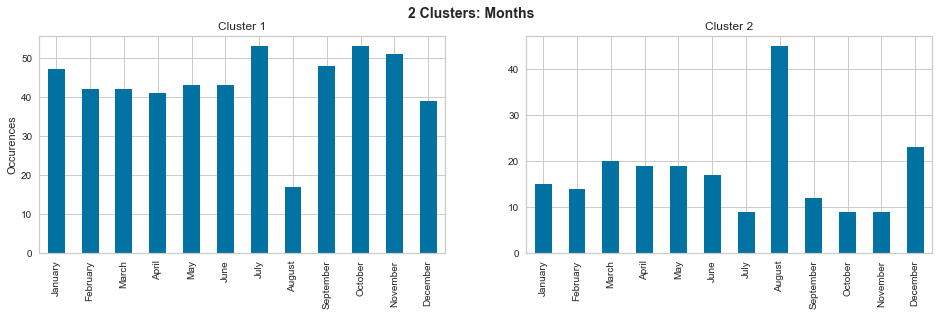

In [704]:
fig=plt.figure(figsize=(16,4))
ax=fig.add_subplot(1,2,1)
X_df_0.groupby(X_df_0.index.month_name()).count().reindex(month_order).plot(kind='bar',ax=ax)
ax2=fig.add_subplot(1,2,2)
X_df_1.groupby(X_df_1.index.month_name()).count().reindex(month_order).plot(kind='bar',ax=ax2)
ax.set_title("Cluster 1")
ax.set_ylabel("Occurences")
ax2.set_title("Cluster 2")
plt.suptitle(("2 Clusters: Months"),
                 fontsize=14, fontweight='bold')

Text(0.5, 0.98, '2 Clusters: Days')

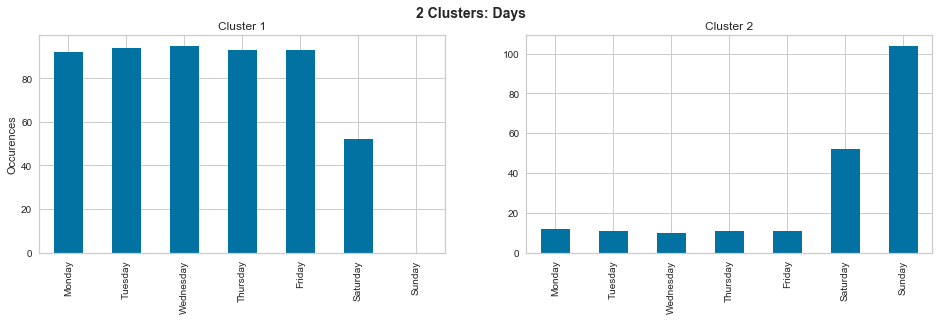

In [705]:
fig=plt.figure(figsize=(16,4))
ax=fig.add_subplot(1,2,1)
X_df_0.groupby(X_df_0.index.day_name()).count().reindex(day_order).plot(kind='bar',ax=ax)
ax2=fig.add_subplot(1,2,2)
X_df_1.groupby(X_df_1.index.day_name()).count().reindex(day_order).plot(kind='bar',ax=ax2)
ax.set_title("Cluster 1")
ax.set_ylabel("Occurences")
ax2.set_title("Cluster 2")
plt.suptitle(("2 Clusters: Days"),
                 fontsize=14, fontweight='bold')

In [706]:
##Create a dataframe for the centers by hour
center_df = pd.DataFrame(centers)
center_df
times_list=[]
times_list = list(avg_df)
times_list.remove('Outcome')
col_rename_dict = {i:j for i,j in zip(list(center_df.columns),times_list)}
center_df.rename(columns=col_rename_dict, inplace=True)

Text(0.5, 0.98, '2 Clusters vs Centroids')

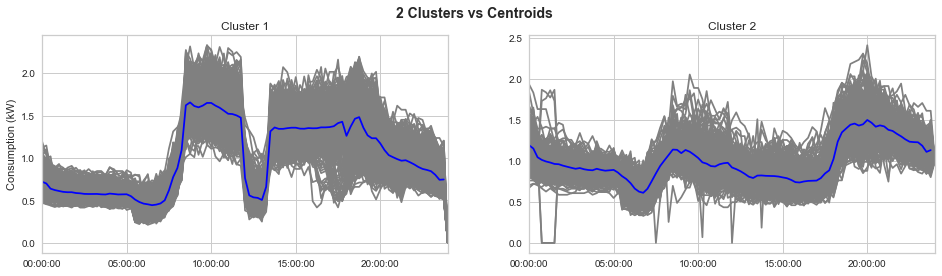

In [707]:
fig=plt.figure(figsize=(16,4))
ax=fig.add_subplot(1,2,1)
X_df[X_df['Outcome']==0].T.plot.line(color='grey', legend=False, ax=ax)
center_df.iloc[0].plot.line(color='blue', ax=ax, legend=False)
ax2=fig.add_subplot(1,2,2)
X_df[X_df['Outcome']==1].T.plot.line(color='grey', legend=False, ax=ax2)
center_df.iloc[1].plot.line(color='blue', ax=ax2, legend=False)


ax.set_title("Cluster 1")
ax.set_ylabel("Consumption (kW)")
ax2.set_title("Cluster 2")
plt.suptitle(("2 Clusters vs Centroids"),
                 fontsize=14, fontweight='bold')

#### Explanation of Observations

* There appears to be a differentiation based on seasonality. There is a peak in cluster 2 in August and on weekends, as compared to cluster 1 which appears to be the other months and weekdays.
* Observing the energy usage, cluster 1 appears to run higher during the day, whereas cluster 2 peaks during the evenings
* We could think of activities or behaviours that correlate to these observations. Potentially the clientelle are generally out on Sundays and require lower energy usage for example. 

#### 3.2.3. Assess the 5 Cluster Result

In [708]:
clusterer = KMeans(n_clusters=3)
cluster_labels = clusterer.fit_predict(X)
centers = clusterer.cluster_centers_
X_df = pd.DataFrame.from_records(X)
clusterlabel_df = (pd.DataFrame(cluster_labels))
X_df['Outcome'] = clusterlabel_df
X_df.columns = avg_df.columns
# Change index to dates
X_df.index = pd.to_datetime(X_df.index, origin=pd.Timestamp('2013-01-01'), unit='d')  

In [709]:
X_df_0 = X_df[X_df['Outcome']==0]['Outcome']
X_df_1 = X_df[X_df['Outcome']==1]['Outcome']
X_df_2 = X_df[X_df['Outcome']==2]['Outcome']

Text(0.5, 0.98, '3 Clusters: Months')

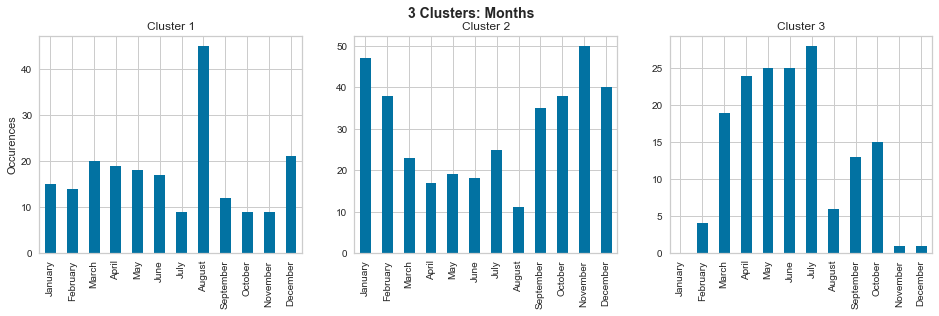

In [710]:
fig=plt.figure(figsize=(16,4))
ax=fig.add_subplot(1,3,1)
X_df_0.groupby(X_df_0.index.month_name()).count().reindex(month_order).plot(kind='bar',ax=ax)
ax2=fig.add_subplot(1,3,2)
X_df_1.groupby(X_df_1.index.month_name()).count().reindex(month_order).plot(kind='bar',ax=ax2)
ax3=fig.add_subplot(1,3,3)
X_df_2.groupby(X_df_2.index.month_name()).count().reindex(month_order).plot(kind='bar',ax=ax3)
ax.set_title("Cluster 1")
ax.set_ylabel("Occurences")
ax2.set_title("Cluster 2")
ax3.set_title("Cluster 3")
plt.suptitle(("3 Clusters: Months"),
                 fontsize=14, fontweight='bold')

Text(0.5, 0.98, '3 Clusters: Days')

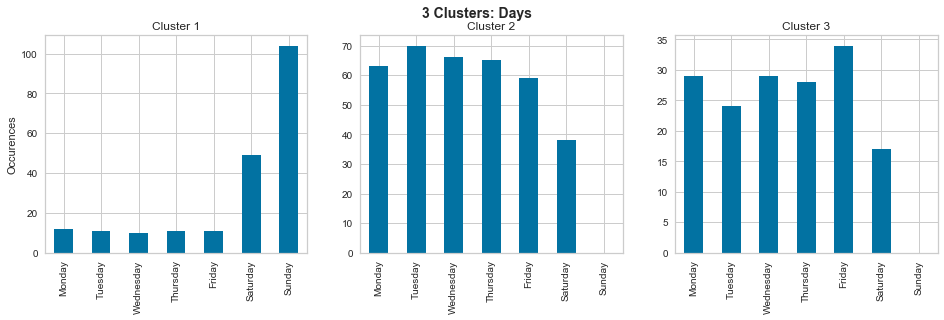

In [711]:
fig=plt.figure(figsize=(16,4))
ax=fig.add_subplot(1,3,1)
X_df_0.groupby(X_df_0.index.day_name()).count().reindex(day_order).plot(kind='bar',ax=ax)
ax2=fig.add_subplot(1,3,2)
X_df_1.groupby(X_df_1.index.day_name()).count().reindex(day_order).plot(kind='bar',ax=ax2)
ax3=fig.add_subplot(1,3,3)
X_df_2.groupby(X_df_2.index.day_name()).count().reindex(day_order).plot(kind='bar',ax=ax3)
ax.set_title("Cluster 1")
ax.set_ylabel("Occurences")
ax2.set_title("Cluster 2")
ax3.set_title("Cluster 3")
plt.suptitle(("3 Clusters: Days"),
                 fontsize=14, fontweight='bold')

In [712]:
##Create a dataframe for the centers by hour
center_df = pd.DataFrame(centers)
center_df

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,1.196017,1.155130,1.049036,1.016773,0.997081,0.984042,0.967066,0.963428,0.946147,0.932788,...,1.366260,1.330168,1.301446,1.264141,1.234626,1.230854,1.227842,1.185188,1.110772,1.132641
1,0.719596,0.696282,0.656227,0.641552,0.629948,0.619139,0.613402,0.611998,0.601607,0.598152,...,1.004368,0.981860,0.948910,0.924281,0.900280,0.886427,0.872258,0.827399,0.771010,0.762897
2,0.725066,0.709431,0.600737,0.580548,0.571658,0.562302,0.561641,0.565773,0.557219,0.553591,...,0.909447,0.887098,0.875270,0.832732,0.812127,0.804176,0.787488,0.753331,0.687001,0.716594


In [713]:
times_list=[]
times_list = list(avg_df)
times_list.remove('Outcome')

In [714]:
col_rename_dict = {i:j for i,j in zip(list(center_df.columns),times_list)}
center_df.rename(columns=col_rename_dict, inplace=True)

Text(0.5, 0.98, '3 Clusters vs Centroids')

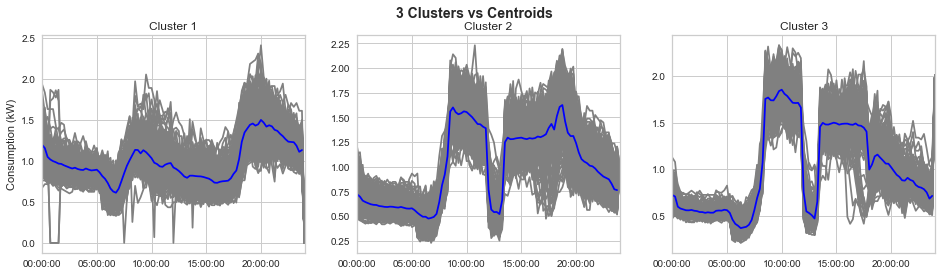

In [715]:
fig=plt.figure(figsize=(16,4))
ax=fig.add_subplot(1,3,1)
X_df[X_df['Outcome']==0].T.plot.line(color='grey', legend=False, ax=ax)
center_df.iloc[0].plot.line(color='blue', ax=ax, legend=False)
ax2=fig.add_subplot(1,3,2)
X_df[X_df['Outcome']==1].T.plot.line(color='grey', legend=False, ax=ax2)
center_df.iloc[1].plot.line(color='blue', ax=ax2, legend=False)
ax3=fig.add_subplot(1,3,3)
X_df[X_df['Outcome']==2].T.plot.line(color='grey', legend=False, ax=ax3)
center_df.iloc[2].plot.line(color='blue', ax=ax3, legend=False)


ax.set_title("Cluster 1")
ax.set_ylabel("Consumption (kW)")
ax2.set_title("Cluster 2")
ax3.set_title("Cluster 3")
plt.suptitle(("3 Clusters vs Centroids"),
                 fontsize=14, fontweight='bold')

#### Explanation of Observations

* 3 clusters potentially shows 3 seasons: Fall/Winter, August, Spring/Summer. Again there is a cluster which differentiates weekends
* Clusters 1 and 3 look similar, with 2 peaks of energy usage during the afternoon / evening
* Cluster 2 again corresponds to the weekends & generally with August, where we see the energy consumption lower throughout the day and rise towards the evening

## 4. Appendix
### 4.1. References

* Reference WCCS Elbow Graph: https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset
* Reference Silhouette Analysis: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
* Reference Centroid Labels to Dataframe: https://stackoverflow.com/questions/27504870/sklearn-kmeans-get-class-centroid-labels-and-reference-to-a-dataset
* Reference for dates/pandas: https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-pandas

### 4.2. Useful Notes

#### Indrani on whether to use Elbow vs Sillhouette:
* Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighbouring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighbouring clusters and negative values indicate that those samples might have been assigned to the wrong cluster. 
* In practice, we carry out kmeans, and compute the mean squared errors.  The elbow graph gives us a good idea to settle at the number of clusters.  The elbow graph can be one indication but it does not clearly say if the clusters are separable and distinct. Often in times where we carry out clustering, one cluster could be really big and say an outlier(s) can be seen as a cluster itself.  
* So, silhouette analysis can be used to study the separation distance between the resulting clusters.
* In this example rightly as the elbow graph pointed out, the silhoutte score was 0.55 for 3 clusters indicating neither far or near to the decision boundary.
* You might want to do both of these since the dataset is fairly small.  But in real world, domain knowledge and things like seasonality, etc. might also play a great role in addition to methods like these.


#### From SKLearn
* Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
* Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].
* Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.
* Also from the thickness of the silhouette plot the cluster size can be visualized. Want: "all the plots are more or less of similar thickness "